# Двухслойная нейронная сеть

1. Изменяем пораметры двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведём анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

## Шаг 1. Определение функций, которые понадобяться для обучения

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

## Шаг 2. Подготовка тренировочных данных

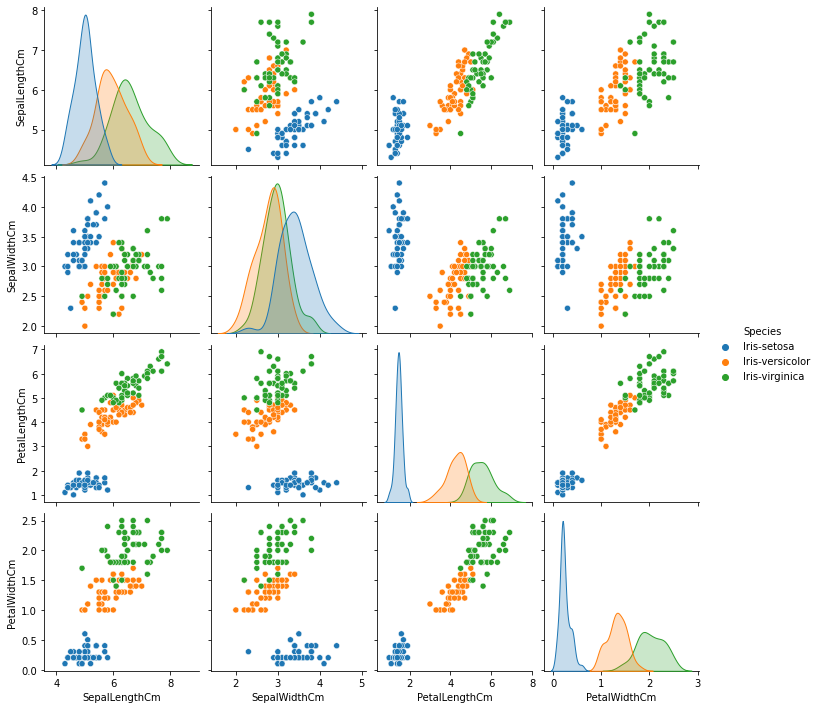

In [4]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

## Шаг 3. Обученние нейронной сети

### Подбор числа эпох

In [5]:
# определим число нейронов скрытого слоя
neuron_numb = 2

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
array_errors = {}
# количество эпох
array_epochs = range(100, 1100, 100)
# процесс обучения
for epochs in array_epochs:
    errors = []
    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    for i in range(epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        #accuracy = (1 - error) * 100
    array_errors[epochs] = errors

#### Демонстрация полученных результатов

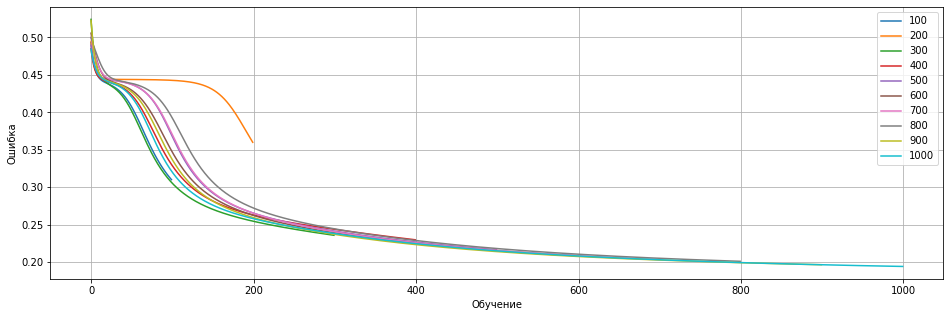

Аккуратность нейронной сети при epoch = 100:  68.98 %
Аккуратность нейронной сети при epoch = 200:  64.0 %
Аккуратность нейронной сети при epoch = 300:  76.41 %
Аккуратность нейронной сети при epoch = 400:  77.01 %
Аккуратность нейронной сети при epoch = 500:  78.34 %
Аккуратность нейронной сети при epoch = 600:  79.15 %
Аккуратность нейронной сети при epoch = 700:  79.64 %
Аккуратность нейронной сети при epoch = 800:  79.88 %
Аккуратность нейронной сети при epoch = 900:  80.34 %
Аккуратность нейронной сети при epoch = 1000:  80.57 %


In [6]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
for key, array_error in array_errors.items():
    plt.plot(array_error, label = f'{key}')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

for key, array_error in array_errors.items():
    print(f'Аккуратность нейронной сети при epoch = {key}:  {round((1 - array_error[-1]) * 100,2)} %')

#### Тест

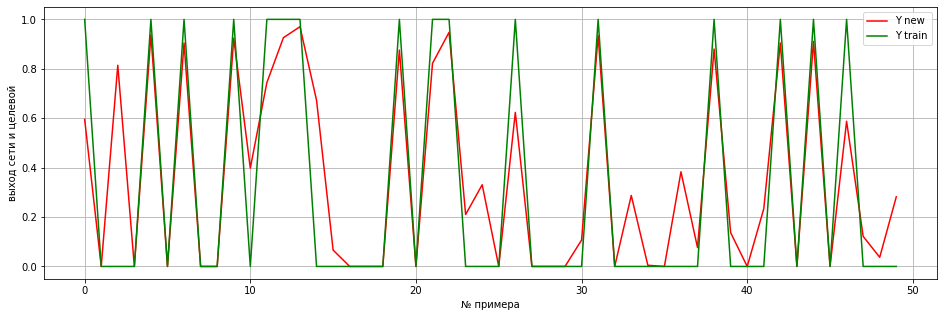

Аккуратность нейронной сети на тесте 80.71%


In [7]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### Подбор количества нейронов

In [8]:
# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
array_errors = {}
# определим число нейронов скрытого слоя
array_neuron_numb = range(2, 11, 1)
# процесс обучения
for neuron_numb in array_neuron_numb:
    errors = []
    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    for i in range(1000):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        #accuracy = (1 - error) * 100
    array_errors[neuron_numb] = errors

#### Демонстрация полученных результатов

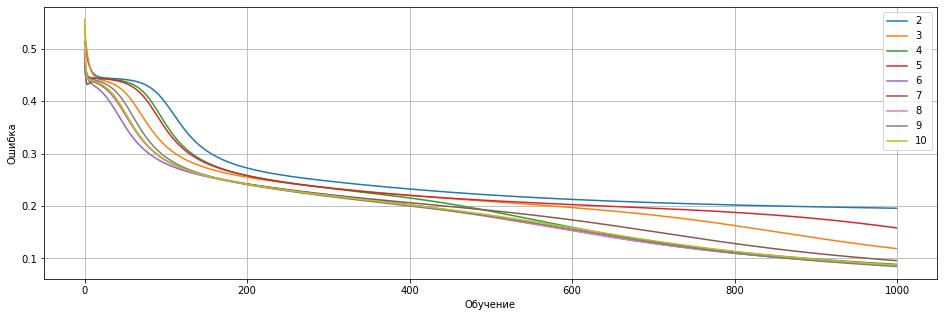

Аккуратность нейронной сети при neuron = 2:  80.42 %
Аккуратность нейронной сети при neuron = 3:  88.12 %
Аккуратность нейронной сети при neuron = 4:  91.11 %
Аккуратность нейронной сети при neuron = 5:  84.16 %
Аккуратность нейронной сети при neuron = 6:  91.33 %
Аккуратность нейронной сети при neuron = 7:  90.41 %
Аккуратность нейронной сети при neuron = 8:  91.34 %
Аккуратность нейронной сети при neuron = 9:  91.52 %
Аккуратность нейронной сети при neuron = 10:  91.25 %


In [9]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
for key, array_error in array_errors.items():
    plt.plot(array_error, label = f'{key}')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

for key, array_error in array_errors.items():
    print(f'Аккуратность нейронной сети при neuron = {key}:  {round((1 - array_error[-1]) * 100,2)} %')

#### Тест

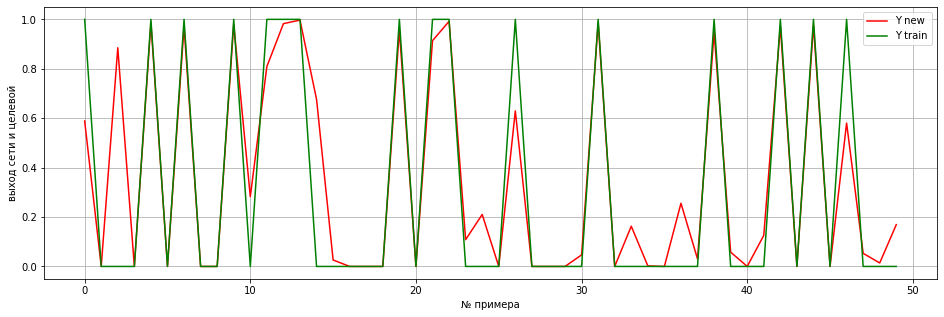

Аккуратность нейронной сети на тесте 91.04%


In [10]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

### Подбор количества слоёв

In [11]:
# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
array_errors = {}
# определим число нейронов скрытого слоя
array_neuron_numb = range(2, 11, 1)
# процесс обучения
for neuron_numb in array_neuron_numb:
    errors = []
    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    w2 = 2*np.random.random((neuron_numb, neuron_numb)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    w3 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    
    for i in range(1000):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))
        layer4 = sigmoid(np.dot(layer3, w3))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer4_error = y_train - layer4 # производная функции потерь = производная квадратичных потерь 
        layer4_delta = layer4_error * sigmoid_deriv(layer4)

        layer3_error = layer4_delta.dot(w3.T)
        layer3_delta = layer3_error * sigmoid_deriv(layer3)

        layer2_error = layer3_delta.dot(w2.T)
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w3 += layer1.T.dot(layer4_delta) * n
        w2 += layer1.T.dot(layer3_delta) * n
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        # метрика модели
        error = np.mean(np.abs(layer4_error))
        errors.append(error)
        #accuracy = (1 - error) * 100
    array_errors[neuron_numb] = errors

#### Демонстрация полученных результатов

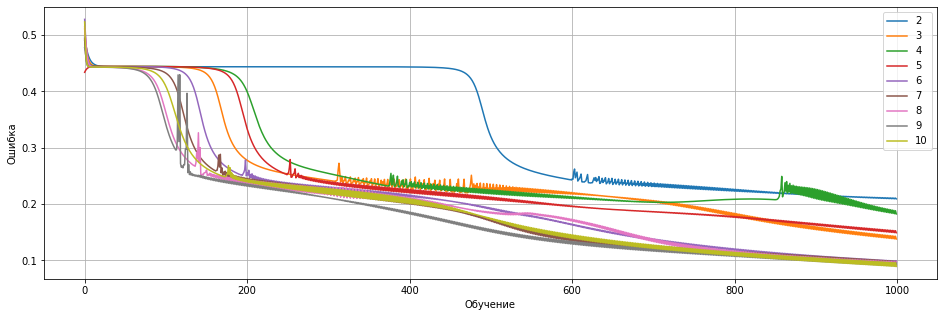

Аккуратность нейронной сети при neuron = 2:  79.07 %
Аккуратность нейронной сети при neuron = 3:  86.21 %
Аккуратность нейронной сети при neuron = 4:  81.76 %
Аккуратность нейронной сети при neuron = 5:  85.1 %
Аккуратность нейронной сети при neuron = 6:  90.11 %
Аккуратность нейронной сети при neuron = 7:  90.76 %
Аккуратность нейронной сети при neuron = 8:  90.27 %
Аккуратность нейронной сети при neuron = 9:  90.5 %
Аккуратность нейронной сети при neuron = 10:  91.08 %


In [12]:
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
for key, array_error in array_errors.items():
    plt.plot(array_error, label = f'{key}')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()

for key, array_error in array_errors.items():
    print(f'Аккуратность нейронной сети при neuron = {key}:  {round((1 - array_error[-1]) * 100,2)} %')

#### Тест

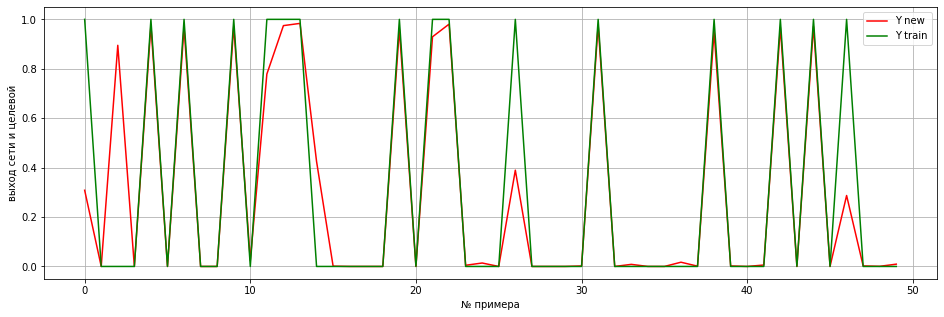

Аккуратность нейронной сети на тесте 89.8%


In [13]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer3_t = sigmoid(np.dot(layer2_t, w2))
layer4_t = sigmoid(np.dot(layer3_t, w3))
layer4_error_t = y_test - layer4_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer4_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer4_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

# Вывод:
_Нейросети очень зависимы от числа эпох при обучении, при большом количестве эпох происходит переобучение и соответственно ухудшение результатов на тесте. Лучше проводить обучение ориентируясь на допустимую ошибку, чем задавать определённое количество эпох. На хороший результат работы нейросетей влияет и количество нейронов в сети, но и здесь нужно быть осторожным и для каждой задачи есть определённое количество нейронов, больше которого результат улучшаться уже не будет. А вот с глубиной не всё так просто, здесь ответы может дать только эксперимент._